In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from scipy.spatial.distance import cdist

%matplotlib inline

### Fisher Iris dataset

In [2]:
iris_db = np.load("datasets/Iris_data.npy")
iris_labels = np.load("datasets/Iris_labels.npy")
print(iris_db.shape, iris_labels.shape)
print(np.unique(iris_labels))

(150, 4) (150,)
[0 1 2]


Iris dataset contains 150 samples along 4 different features for a given sample.

The four features are as -

- Sepal length
- Sepal width
- Petal length
- Petal widtd

Iris Lables dataset likewise contains 150 samples for each of the corresponding sample in the Iris DB. It contains three unique tags - each for a different species of the flower.

- 0 - I. setosa
- 1 - I. versicolor
- 2 - I. virginica

Text(0.5, 1.0, 'Iris dataset')

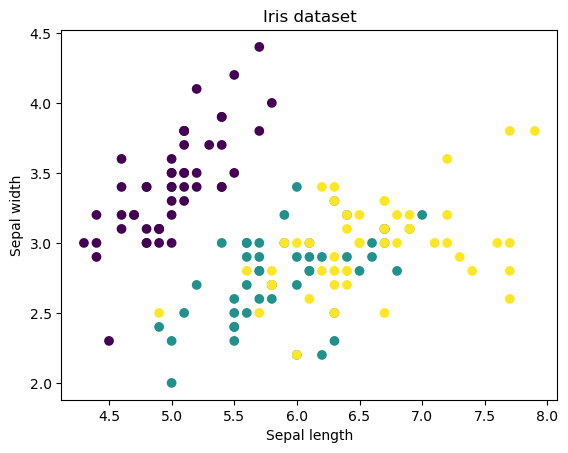

In [3]:
plt.scatter(iris_db[:,0], iris_db[:,1], c=iris_labels)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Iris dataset")

### Clustering KMeans

- In the code that follows, I create a KMeans object with number of clusters as 3.
- After that I train the model with iris dataset and subsequently predict the labels.
- Once the labels are predicted, I extract and plot the predicted clusters (marker: 'o') with their corresponding centeroids (marker 'x').

In [4]:
kmeans = KMeans(n_clusters=3)

In [5]:
y_labels = kmeans.fit_predict(iris_db)

C:\Programs\Anaconda2023\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Programs\Anaconda2023\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Iris - kmeans with centroid')

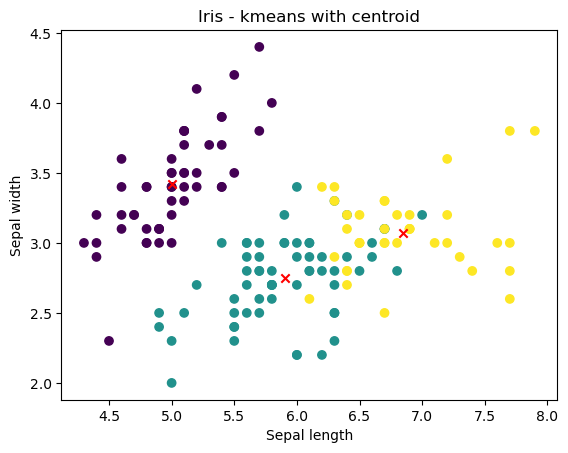

In [6]:
plt.scatter(iris_db[:,0], iris_db[:,1], c=y_labels)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:, 1], 
            c="red", marker="x")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Iris - kmeans with centroid")

Improved K-means:

C:\Programs\Anaconda2023\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Iris - kmeans improved with centroid')

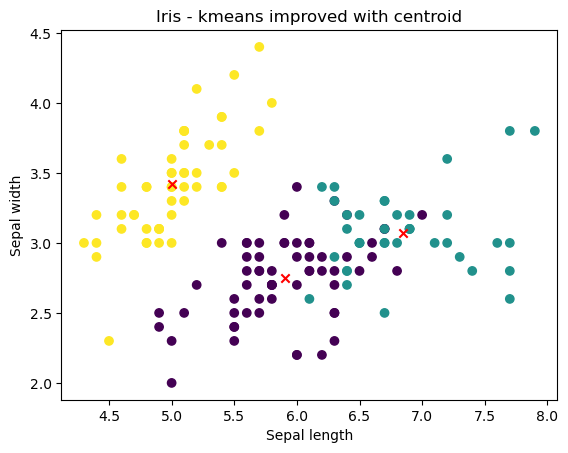

In [7]:
kmean_improved = KMeans(n_clusters=3, init="random", n_init=20)
y_labels_improved = kmean_improved.fit_predict(iris_db)

plt.scatter(iris_db[:,0], iris_db[:,1], c=y_labels_improved)
plt.scatter(kmean_improved.cluster_centers_[:,0], 
            kmean_improved.cluster_centers_[:, 1], 
            c="red", marker="x")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Iris - kmeans improved with centroid")

### Clustering GMM

- In the code that follows, I create a Gaussian Mixture object with number of components as 3.
- After that I train the model with iris dataset and subsequently predict the labels.
- Once the labels are predicted, I extract and plot the predicted clusters (marker: 'o') with their corresponding means (marker 'x').

In [8]:
gmm = GaussianMixture(n_components=3)
y_labels_gmm = gmm.fit_predict(iris_db)

C:\Programs\Anaconda2023\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Iris - GaussianMixture with means')

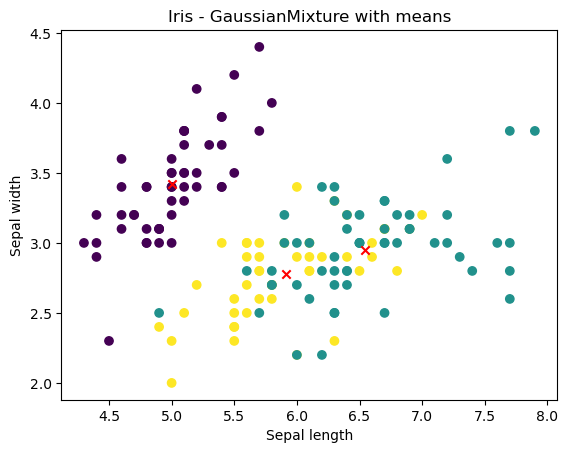

In [9]:
plt.scatter(iris_db[:,0], iris_db[:,1], c=y_labels_gmm)
plt.scatter(gmm.means_[:,0], 
            gmm.means_[:, 1], 
            c="red", marker="x")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Iris - GaussianMixture with means")

Predicting Posterior Probabilities:

In [10]:
#Posterior probabilities
post_preds = gmm.predict_proba(iris_db)
post_preds.shape

(150, 3)

Text(0.5, 0, 'Sepal length')

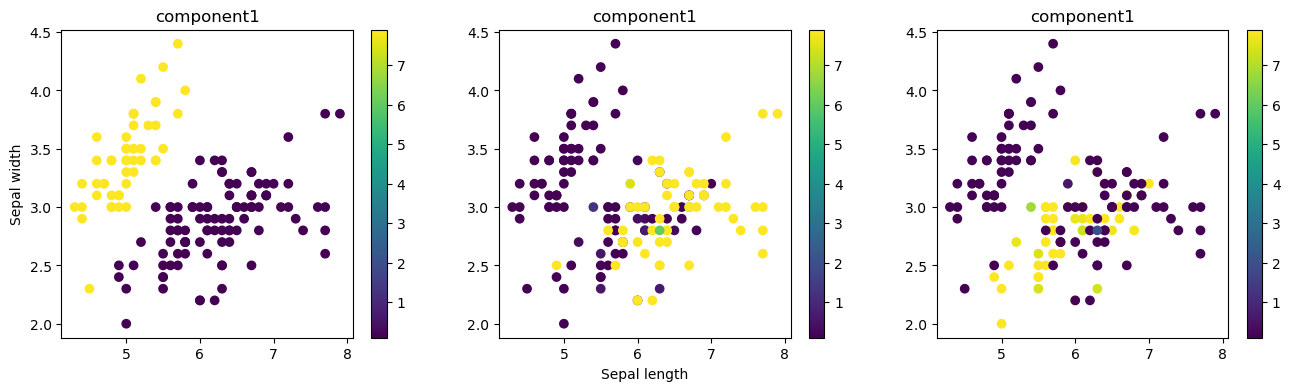

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(16,4))

for i in range(3):
    ax[i].scatter(iris_db[:,0], iris_db[:,1], c=post_preds[:,i])
    im = ax[i].imshow(iris_db[:, 0:2])
    plt.colorbar(im, ax=ax[i])
    ax[i].set_title('component1')

ax[0].set_ylabel('Sepal width')
ax[1].set_xlabel('Sepal length')

### Kmeans on a random dataset

In [12]:
task2_4db = np.load("datasets/task2_4.npy")

In [13]:
task2_4db.shape

(100, 10)

Using Elbow method to predict the optimal number of clusters:

In [49]:
distortions = []
mappings = {}
K = [i for i in range(1, 10)]

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(task2_4db)
    kmeanModel.fit(task2_4db)
    distortions.append(sum(np.min(cdist(task2_4db, kmeanModel.cluster_centers_,
                                       'euclidean'), axis=1)) / task2_4db.shape[0])
    mappings[k] = sum(np.min(cdist(task2_4db, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / task2_4db.shape[0]

C:\Programs\Anaconda2023\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Programs\Anaconda2023\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Programs\Anaconda2023\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Programs\Anaconda2023\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Programs\Anaconda2023\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Programs\Anaconda2023\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Programs\Anaconda2023\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Programs\Anaconda2023\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [44]:
for key, val in mappings.items():
    print(f'{key} : {val}')

1 : 16.531008731340684
2 : 13.489228659058798
3 : 10.649561750620338
4 : 8.041892839721383
5 : 5.70593704183995
6 : 3.5985238335430627
7 : 3.5275745252535575
8 : 3.4962155436485056
9 : 3.427117389607706


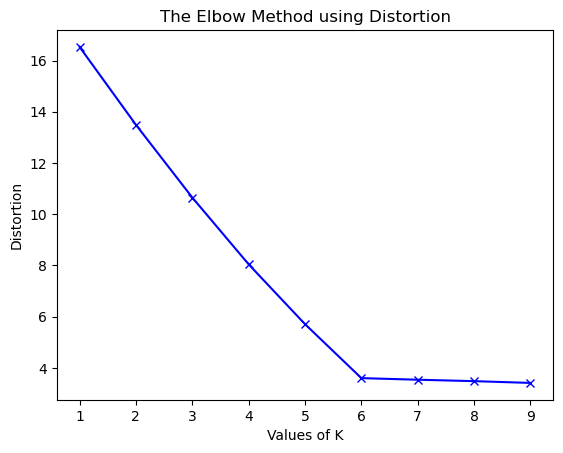

In [51]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

The distortion plateaus out at 6 in the Elbow method above, therefore 6 is the optimal number of clusters for the given dataset.

In [52]:
kmean_task = KMeans(n_clusters=6, init="random", n_init=20)

In [53]:
y_clust = kmean_task.fit_predict(task2_4db)

C:\Programs\Anaconda2023\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


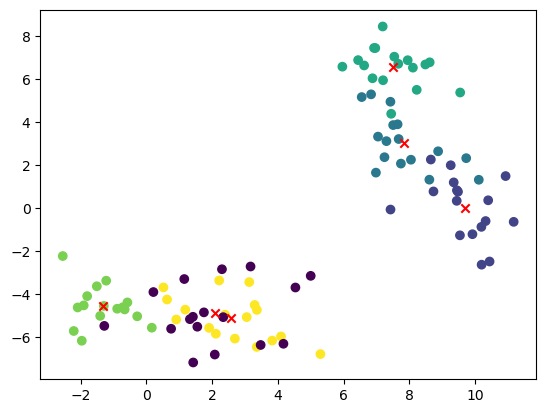

In [54]:
plt.scatter(task2_4db[:,0], task2_4db[:,1], c=y_clust)
plt.scatter(kmean_task.cluster_centers_[:,0], 
            kmean_task.cluster_centers_[:, 1], 
            c="red", marker="x")